In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [25]:
pip install scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv(r"E:\Spectrum\Project 2\DataSet\Loan.csv")
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,1/1/2018,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,1/2/2018,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,1/3/2018,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,1/4/2018,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,1/5/2018,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179141,0.070210,1,36.0


In [4]:
df.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [7]:
df = df.drop(columns=['ApplicationDate'])

In [10]:
# One-hot encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [11]:
X = df_encoded.drop(columns=['LoanApproved', 'RiskScore'])
y = df_encoded['RiskScore']

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
#Apply ElasticNetCV for feature selection
elastic_net = ElasticNetCV(l1_ratio=[.1, .5, .7, .95, .99, 1], cv=5, random_state=42)
elastic_net.fit(X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.95, 0.99, 1], random_state=42)

In [28]:
#Extract and display selected features
coef = pd.Series(elastic_net.coef_, index=X.columns)
selected_features = coef[coef != 0].sort_values(ascending=False)

selected_feature_names = selected_features.index.tolist()
print(f"Number of features selected by Elastic Net: {len(selected_features)}")
print("\nSelected features and their coefficients:\n")
print(selected_features)

Number of features selected by Elastic Net: 41

Selected features and their coefficients:

BankruptcyHistory                 2.929969
DebtToIncomeRatio                 2.467845
PreviousLoanDefaults              2.072849
InterestRate                      1.308534
EmploymentStatus_Unemployed       0.885293
CreditCardUtilizationRate         0.761390
EmploymentStatus_Self-Employed    0.759350
MonthlyLoanPayment                0.367571
LoanAmount                        0.351859
MonthlyDebtPayments               0.279658
EducationLevel_High School        0.159814
TotalLiabilities                  0.146769
HomeOwnershipStatus_Rent          0.121740
HomeOwnershipStatus_Other         0.083397
LoanPurpose_Debt Consolidation    0.062267
MaritalStatus_Widowed             0.054393
MaritalStatus_Married             0.045452
LoanPurpose_Other                 0.045001
LoanPurpose_Home                  0.031877
NumberOfCreditInquiries           0.022929
CheckingAccountBalance            0.002646
Utilit

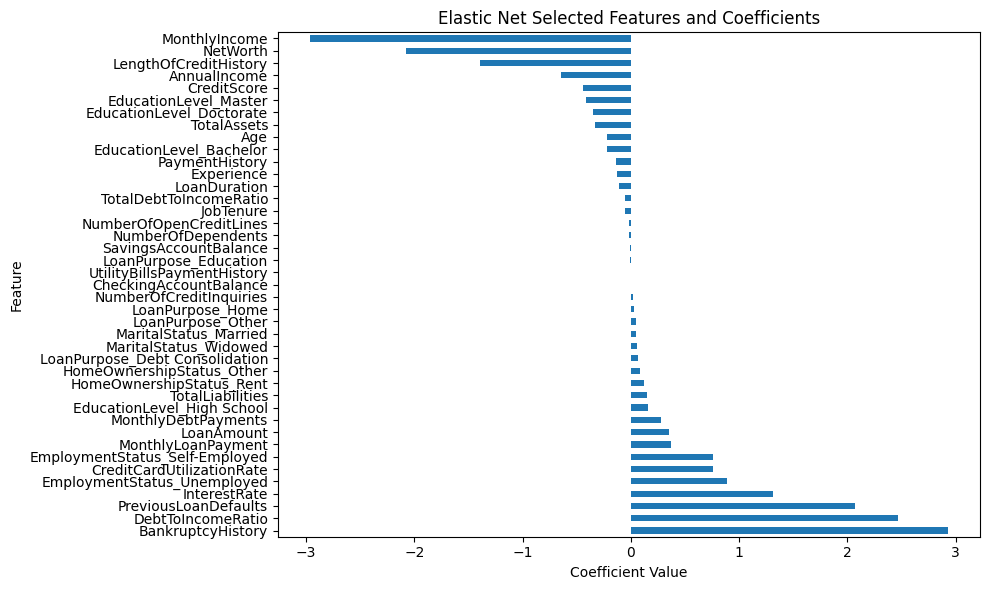

In [22]:
plt.figure(figsize=(10, 6))
selected_features.plot(kind='barh')
plt.title('Elastic Net Selected Features and Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [23]:
print("Original number of features before Elastic Net:", X.shape[1])

Original number of features before Elastic Net: 44


In [ ]:
#Data Setup
X_class = df_encoded[selected_feature_names]
y_class = df_encoded['LoanApproved']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)

In [31]:
#scaled features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
#Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=12, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, subsample=0.8, random_state=42),
    "Support Vector Machine": SVC(C=0.5, probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=9, weights='uniform', metric='minkowski'),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(32,), alpha=0.005, early_stopping=True, validation_fraction=0.1, max_iter=500, random_state=42)
}

In [48]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)

Best parameters: {'n_neighbors': 9, 'weights': 'uniform'}


In [52]:
print(f"{'Model':<25} {'Train':<10} {'Test':<10} {'CV Mean':<10} {'CV Std'}")
print("-" * 65)

for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))

    # Accuracy metrics
    train_acc = model.score(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

    print(f"{name:<25} {train_acc:.4f}     {test_acc:.4f}     {cv_scores.mean():.4f}     {cv_scores.std():.4f}")
    

Model                     Train      Test       CV Mean    CV Std
-----------------------------------------------------------------

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3044
           1       0.93      0.92      0.93       956

    accuracy                           0.97      4000
   macro avg       0.96      0.95      0.95      4000
weighted avg       0.97      0.97      0.97      4000

Logistic Regression       0.9663     0.9665     0.9646     0.0031

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3044
           1       0.89      0.80      0.84       956

    accuracy                           0.93      4000
   macro avg       0.91      0.89      0.90      4000
weighted avg       0.93      0.93      0.93      4000

Random Forest             0.9711     0.9290     0.9243     0.0053

--- Gradient Boosting ---
   

In [40]:
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)
print(f"{name} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

Neural Network (MLP) - Train Accuracy: 0.9773, Test Accuracy: 0.9647
